In [ ]:
Data Wrangling II operations using Python. (e.g., Academic_Performance.csv)
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using mean and mode).Apply for single column and whole dataset.
2. Scan all numeric variables for outliers. If there are outliers,any of the suitable techniques to deal with them.(using z score)
3. Display and Remove the outliers
4. Apply data transformations on at least one of the variables Create bins and Labels. 
5. Draw box plot

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\AcademicPerformance_New.csv")
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [5]:
df.isnull().sum()

Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [7]:
df.fillna(0,inplace=True)

In [11]:
mean=df["WT"].mean()
df["WT"]=df["WT"].fillna(mean)
df

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,0.0,53.000000,B,No
2,0.0,0,0.0,0.0,0.0,0.000000,0,0
3,4.0,China,47.0,0.0,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,0.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,0.0,0.0,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [13]:

df.dropna()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,0.0,53.000000,B,No
2,0.0,0,0.0,0.0,0.0,0.000000,0,0
3,4.0,China,47.0,0.0,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,0.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,0.0,0.0,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [39]:
# Now you can compute the mean and fill missing values
df['Average'] = df['Average'].fillna(df['Average'].mean())

In [15]:
from scipy import stats
z_score=stats.zscore(df.select_dtypes (include='number'))
threshold=0
outlier=df[(z_score>threshold).any(axis=1)]
df=df[(z_score<=threshold).all(axis=1)]

In [17]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
2,0.0,0,0.0,0.0,0.0,0.000000,0,0
3,4.0,China,47.0,0.0,44.0,30.333333,D,Yes
7,8.0,India,40.0,43.0,39.0,40.666667,D,Yes
9,10.0,China,38.0,60.0,50.0,49.333333,D,Yes
10,11.0,Japan,0.0,54.0,52.0,35.333333,D,No


In [41]:
bins = [0, 30, 50, 100]
labels = ['0-30', '31-50', '51-100']  
df['Average'] = pd.cut(df['Average'], bins=bins, labels=labels)
print(df['Average'].head())

0    51-100
1    51-100
2    51-100
3     31-50
4    51-100
Name: Average, dtype: category
Categories (3, object): ['0-30' < '31-50' < '51-100']


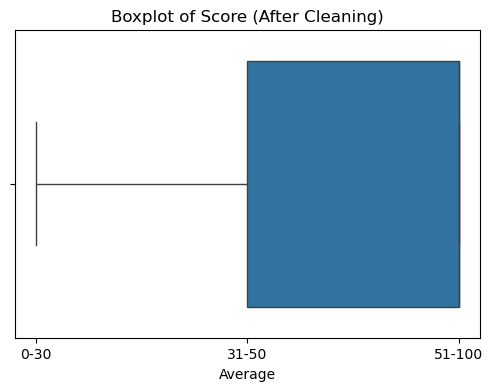

In [45]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Average'])
plt.title('Boxplot of Score (After Cleaning)')
plt.show()